<a href="https://www.kaggle.com/code/ozgeaslan/notebook056fb583c3?scriptVersionId=209250099" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
import pandas as pd
import numpy as np

#görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os
os.listdir("/kaggle/input/financial-data")

['financial_regression.csv']

In [6]:
df_ = pd.read_csv(filepath_or_buffer="/kaggle/input/financial-data/financial_regression.csv")
#aynı yere referans veremmesi için ve de ikisi birden değişmememsi için copy dedik
df = df_.copy()

  

In [7]:
#sentetik olarak eksik veri yaratma
import random
def add_random_missing_values(dataframe: pd.DataFrame,
                             missing_rate: float = 0.05,
                             seed: random = 42) -> pd.DataFrame:
    df_missing = dataframe.copy()
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    if seed:
        random.seed(seed)
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0]-1)
        col_idx = random.randint(0, dataframe.shape[1]-1)
    
        df_missing.iat[row_idx, col_idx] =np.nan
    
    return df_missing
#df = add_random_missing_values(dataframe = df, missing_rate = 0.03)



In [8]:
df = add_random_missing_values(dataframe = df, missing_rate = 0.03)

In [10]:
print(df)

            date  sp500 open  sp500 high  sp500 low  sp500 close  \
0     2010-01-14      114.49    115.1400   114.4200       114.93   
1     2010-01-15      114.73    114.8400   113.2000       113.64   
2     2010-01-18         NaN         NaN        NaN          NaN   
3     2010-01-19      113.62    115.1300   113.5900       115.06   
4     2010-01-20      114.28    114.4500   112.9800       113.89   
...          ...         ...         ...        ...          ...   
3899  2024-10-17      585.91    586.1200   582.1600       582.35   
3900  2024-10-18      584.07    585.3900   582.5800       584.59   
3901  2024-10-21      583.85         NaN   580.6001       583.63   
3902  2024-10-22      581.05    584.5000   580.3800       583.32   
3903  2024-10-23      581.26    581.7086   574.4150       577.99   

      sp500 volume  sp500 high-low  nasdaq open  nasdaq high  nasdaq low  ...  \
0      115646960.0          0.7200        46.26       46.520     46.2200  ...   
1      212252769.0   

In [11]:
df.head(n=3)
#df.tail

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.52,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,NaN
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.55,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.shape

(3904, 47)

In [13]:
columns=df.columns
print("Data seti;",end=" ")
str_columns=(str(columns))
replace_str=str_columns.replace("Index([","")
replace_str=replace_str.replace("],","")
replace_str=replace_str.replace("      dtype='object')","")
replace_str=replace_str.replace("\n","")
replace_str=replace_str.replace("       ","")
replace_str=replace_str.replace("'","")
print(replace_str, end=" sütunlarını içermektedir.")

print('\n')
print(f"Veri seti içeriisnde toplam {len(df.columns)} kolon var. \n")
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

Data seti; date, sp500 open, sp500 high, sp500 low, sp500 close,sp500 volume, sp500 high-low, nasdaq open, nasdaq high,nasdaq low, nasdaq close, nasdaq volume, nasdaq high-low,us_rates_%, CPI, usd_chf, eur_usd, GDP, silver open,silver high, silver low, silver close, silver volume,silver high-low, oil open, oil high, oil low, oil close,oil volume, oil high-low, platinum open, platinum high,platinum low, platinum close, platinum volume,platinum high-low, palladium open, palladium high,palladium low, palladium close, palladium volume,palladium high-low, gold open, gold high, gold low,gold close, gold volume sütunlarını içermektedir.

Veri seti içeriisnde toplam 47 kolon var. 

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [15]:
#veriseti analizi için featureların durumlarını görmek isteriz.
#Sentetik olarak değiştirdiğimiz bu verisetinde NaN olmayan satır sayısı bulunmaktadır.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3796 non-null   object 
 1   sp500 open          3640 non-null   float64
 2   sp500 high          3611 non-null   float64
 3   sp500 low           3607 non-null   float64
 4   sp500 close         3611 non-null   float64
 5   sp500 volume        3604 non-null   float64
 6   sp500 high-low      3606 non-null   float64
 7   nasdaq open         3613 non-null   float64
 8   nasdaq high         3593 non-null   float64
 9   nasdaq low          3614 non-null   float64
 10  nasdaq close        3603 non-null   float64
 11  nasdaq volume       3602 non-null   float64
 12  nasdaq high-low     3628 non-null   float64
 13  us_rates_%          170 non-null    float64
 14  CPI                 171 non-null    float64
 15  usd_chf             3588 non-null   float64
 16  eur_us

In [16]:
df.dtypes
#veri kategorik mi nümerik mi kalmalı bakılmalı

date                   object
sp500 open            float64
sp500 high            float64
sp500 low             float64
sp500 close           float64
sp500 volume          float64
sp500 high-low        float64
nasdaq open           float64
nasdaq high           float64
nasdaq low            float64
nasdaq close          float64
nasdaq volume         float64
nasdaq high-low       float64
us_rates_%            float64
CPI                   float64
usd_chf               float64
eur_usd               float64
GDP                   float64
silver open           float64
silver high           float64
silver low            float64
silver close          float64
silver volume         float64
silver high-low       float64
oil open              float64
oil high              float64
oil low               float64
oil close             float64
oil volume            float64
oil high-low          float64
platinum open         float64
platinum high         float64
platinum low          float64
platinum c

In [17]:
categorical_features = []
numerical_features = []
for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)
        
print(f"Kategorik veriseti özelliği: {categorical_features[0]} \nKategorik veriseti özelliği sayısı {len(categorical_features)}")
#Tarih her ne kadar bakıldığında nümerik gibi görünse de kategörik bir özelliktir  

#Benim verisetimde sadece 1 adet kategorik veri bulunuyor. Daha fazla bulunması durumunda farklı uygulamalar yapılabilirdi.
#Örneğin, One-hot encoding 

Kategorik veriseti özelliği: date 
Kategorik veriseti özelliği sayısı 1


In [18]:
for col in df.columns:
    if col in categorical_features:
        df[col] = pd.Categorical(df[col])

In [19]:
df.info()
#Object olan date özelliğimiz Category olarak değişti.
#Kategorik veri hafızada daha fazla yer açılmasını sağlar.
#Veri görselleştirme için kategorik veriye çevirmek uygundur.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   date                3796 non-null   category
 1   sp500 open          3640 non-null   float64 
 2   sp500 high          3611 non-null   float64 
 3   sp500 low           3607 non-null   float64 
 4   sp500 close         3611 non-null   float64 
 5   sp500 volume        3604 non-null   float64 
 6   sp500 high-low      3606 non-null   float64 
 7   nasdaq open         3613 non-null   float64 
 8   nasdaq high         3593 non-null   float64 
 9   nasdaq low          3614 non-null   float64 
 10  nasdaq close        3603 non-null   float64 
 11  nasdaq volume       3602 non-null   float64 
 12  nasdaq high-low     3628 non-null   float64 
 13  us_rates_%          170 non-null    float64 
 14  CPI                 171 non-null    float64 
 15  usd_chf             3588 non-null   fl

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sp500 open,3640.0,2.687578e+02,1.213179e+02,1.031100e+02,1.698750e+02,2.412050e+02,3.741325e+02,5.859100e+02
sp500 high,3611.0,2.702421e+02,1.216844e+02,1.034200e+02,1.705900e+02,2.430100e+02,3.765975e+02,5.861200e+02
sp500 low,3607.0,2.674580e+02,1.205556e+02,1.011300e+02,1.702000e+02,2.397500e+02,3.709350e+02,5.825800e+02
sp500 close,3611.0,2.690381e+02,1.214605e+02,1.022000e+02,1.700950e+02,2.414400e+02,3.743400e+02,5.845900e+02
sp500 volume,3604.0,1.124007e+08,6.923295e+07,1.708170e+05,6.702312e+07,9.235320e+07,1.362987e+08,7.095045e+08
sp500 high-low,3606.0,3.024467e+00,2.654829e+00,3.000000e-01,1.290000e+00,2.095000e+00,3.795000e+00,2.296000e+01
nasdaq open,3613.0,1.816514e+02,1.228254e+02,4.267000e+01,7.849000e+01,1.393600e+02,2.847900e+02,5.030700e+02
nasdaq high,3593.0,1.832450e+02,1.236304e+02,4.282150e+01,7.929000e+01,1.405600e+02,2.883600e+02,5.035200e+02
nasdaq low,3614.0,1.796546e+02,1.213861e+02,4.155000e+01,7.798500e+01,1.374950e+02,2.808350e+02,4.983900e+02
nasdaq close,3603.0,1.813677e+02,1.223790e+02,4.247000e+01,7.858500e+01,1.393600e+02,2.848150e+02,5.029600e+02


EKSİK VERİ ANALİZİ

In [21]:
df.isna().sum()
#null yani eksik nokta sayısını ifade eder.

date                   108
sp500 open             264
sp500 high             293
sp500 low              297
sp500 close            293
sp500 volume           300
sp500 high-low         298
nasdaq open            291
nasdaq high            311
nasdaq low             290
nasdaq close           301
nasdaq volume          302
nasdaq high-low        276
us_rates_%            3734
CPI                   3733
usd_chf                316
eur_usd                308
GDP                   3847
silver open            299
silver high            292
silver low             313
silver close           284
silver volume          289
silver high-low        292
oil open               294
oil high               285
oil low                300
oil close              276
oil volume             291
oil high-low           298
platinum open          303
platinum high          299
platinum low           279
platinum close         285
platinum volume        316
platinum high-low      311
palladium open         301
p

In [22]:
df.isna().sum().sum()


24179

In [23]:
df.notnull().sum().sum()

159309

In [24]:
df[df.isnull().any(axis = 1)][:5]
#Herhangi bir yerinde eksik veri olan özellikleri gösterir.

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,NaN
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


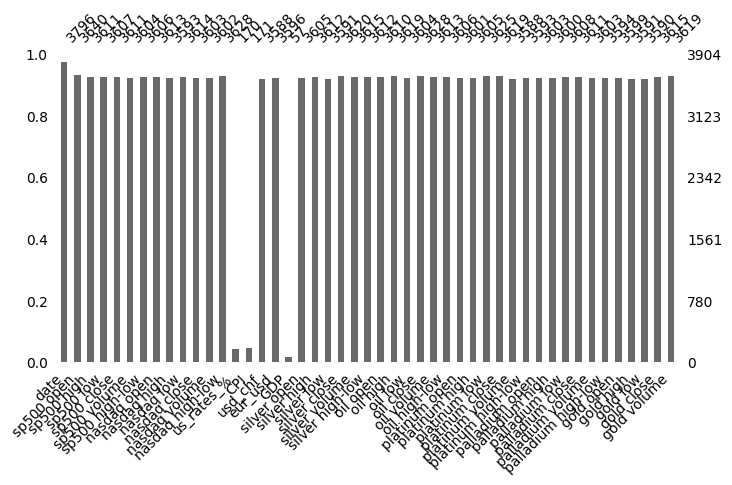

In [25]:
import missingno as msno
msno.bar(df = df,
        figsize = (8, 4),
        fontsize = 10);
#dir(msno)
#dendrogram, heatmap gibi görselleştirme yöntemleri de mevcut
#

In [36]:
df.dropna(inplace=False)[:10]
#False olduğu için kalıcı olarak silmez.

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
55,2010-04-01,117.80,118.2500,117.10,117.80,161083608.0,1.1500,48.34,48.7000,47.79,...,49.3200,48.7730,48.9200,135299.0,0.5470,109.97,110.47,109.9200,110.260,11370417.0
385,2011-07-01,132.09,134.1000,131.78,133.92,201950626.0,2.3200,57.10,57.9850,56.92,...,75.2500,74.1900,75.1000,52275.0,1.0600,144.76,145.07,143.9700,144.930,16364459.0
716,2012-10-01,144.52,145.6900,144.01,144.35,135858200.0,1.6800,68.90,69.3300,68.25,...,64.1600,63.1300,63.1500,73172.0,1.0300,172.83,173.62,171.7700,172.295,10675908.0
1378,2015-04-01,206.43,206.4300,204.51,205.70,137303584.0,1.9200,105.60,105.6200,104.37,...,72.7400,71.8100,72.5434,56251.0,0.9300,114.56,115.99,114.5400,115.600,7324008.0
1642,2016-04-01,204.35,207.1400,203.98,206.92,114423500.0,3.1600,108.58,110.4000,108.39,...,54.4000,53.6300,54.3500,7940.0,0.7700,116.08,116.98,115.5500,116.930,10405379.0
2433,2019-04-01,284.70,286.1600,284.40,285.83,77617945.0,1.7600,181.51,182.2600,180.77,...,135.2900,132.0100,135.0000,62098.0,3.2800,122.40,122.43,121.4600,121.530,13559963.0
2832,2020-10-01,337.69,338.7400,335.01,337.04,88698745.0,3.7300,281.79,282.8794,279.84,...,219.6200,217.1701,218.6500,23518.0,2.4499,178.71,179.50,178.0375,178.700,10402833.0
3096,2021-10-01,430.98,436.0329,427.23,434.24,129240106.0,8.8029,358.60,361.2500,354.38,...,180.1299,177.0000,179.6100,30016.0,3.1299,164.27,164.96,163.8850,164.590,6654686.0
3754,2024-04-01,523.83,524.3800,520.97,522.16,61182995.0,3.4100,444.97,447.5300,443.02,...,92.5200,91.1200,92.4000,45242.0,1.4000,208.68,208.73,206.2900,207.820,13455629.0


In [37]:
df.dropna(how ='all')[:5]
#Tüm değerleri eksikse bu kod ile silinir.

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,NaN
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [55]:
df.dropna(axis = 0)
#axis=0 satırlar için
#axis=1 sütunlar için kullanılır

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
55,2010-04-01,117.80,118.2500,117.10,117.80,161083608.0,1.1500,48.34,48.7000,47.79,...,49.3200,48.7730,48.9200,135299.0,0.5470,109.97,110.47,109.9200,110.260,11370417.0
385,2011-07-01,132.09,134.1000,131.78,133.92,201950626.0,2.3200,57.10,57.9850,56.92,...,75.2500,74.1900,75.1000,52275.0,1.0600,144.76,145.07,143.9700,144.930,16364459.0
716,2012-10-01,144.52,145.6900,144.01,144.35,135858200.0,1.6800,68.90,69.3300,68.25,...,64.1600,63.1300,63.1500,73172.0,1.0300,172.83,173.62,171.7700,172.295,10675908.0
1378,2015-04-01,206.43,206.4300,204.51,205.70,137303584.0,1.9200,105.60,105.6200,104.37,...,72.7400,71.8100,72.5434,56251.0,0.9300,114.56,115.99,114.5400,115.600,7324008.0
1642,2016-04-01,204.35,207.1400,203.98,206.92,114423500.0,3.1600,108.58,110.4000,108.39,...,54.4000,53.6300,54.3500,7940.0,0.7700,116.08,116.98,115.5500,116.930,10405379.0
2433,2019-04-01,284.70,286.1600,284.40,285.83,77617945.0,1.7600,181.51,182.2600,180.77,...,135.2900,132.0100,135.0000,62098.0,3.2800,122.40,122.43,121.4600,121.530,13559963.0
2832,2020-10-01,337.69,338.7400,335.01,337.04,88698745.0,3.7300,281.79,282.8794,279.84,...,219.6200,217.1701,218.6500,23518.0,2.4499,178.71,179.50,178.0375,178.700,10402833.0
3096,2021-10-01,430.98,436.0329,427.23,434.24,129240106.0,8.8029,358.60,361.2500,354.38,...,180.1299,177.0000,179.6100,30016.0,3.1299,164.27,164.96,163.8850,164.590,6654686.0
3754,2024-04-01,523.83,524.3800,520.97,522.16,61182995.0,3.4100,444.97,447.5300,443.02,...,92.5200,91.1200,92.4000,45242.0,1.4000,208.68,208.73,206.2900,207.820,13455629.0


In [67]:
remaining_data=len(df.dropna(axis = 0))/len(df.columns)
print(f"Kalan data yüzdesi: %{100*remaining_data}")

Kalan data yüzdesi: %19.148936170212767


In [69]:
df_fillna = df.copy()
df_fillna.head(4)

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.52,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,NaN
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.55,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.64,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0


In [71]:
df_fillna.isna().sum()
#Eksik veri yüzdeleri

date                   108
sp500 open             264
sp500 high             293
sp500 low              297
sp500 close            293
sp500 volume           300
sp500 high-low         298
nasdaq open            291
nasdaq high            311
nasdaq low             290
nasdaq close           301
nasdaq volume          302
nasdaq high-low        276
us_rates_%            3734
CPI                   3733
usd_chf                316
eur_usd                308
GDP                   3847
silver open            299
silver high            292
silver low             313
silver close           284
silver volume          289
silver high-low        292
oil open               294
oil high               285
oil low                300
oil close              276
oil volume             291
oil high-low           298
platinum open          303
platinum high          299
platinum low           279
platinum close         285
platinum volume        316
platinum high-low      311
palladium open         301
p

In [77]:
mean_nasdaq_data = df_fillna['nasdaq close'].mean()
df_fillna['nasdaq close'].fillna(value = mean_nasdaq_data, inplace = True)
df_fillna.isna().sum()

/tmp/ipykernel_30/1128657818.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['nasdaq close'].fillna(value = mean_nasdaq_data, inplace = True)


date                   108
sp500 open             264
sp500 high             293
sp500 low              297
sp500 close            293
sp500 volume           300
sp500 high-low         298
nasdaq open            291
nasdaq high            311
nasdaq low             290
nasdaq close             0
nasdaq volume          302
nasdaq high-low        276
us_rates_%            3734
CPI                   3733
usd_chf                316
eur_usd                308
GDP                   3847
silver open            299
silver high            292
silver low             313
silver close           284
silver volume          289
silver high-low        292
oil open               294
oil high               285
oil low                300
oil close              276
oil volume             291
oil high-low           298
platinum open          303
platinum high          299
platinum low           279
platinum close         285
platinum volume        316
platinum high-low      311
palladium open         301
p

In [82]:
df_fillna.describe().T

,count,mean,std,min,25%,50%,75%,max
sp500 open,3640.0,2.687578e+02,1.213179e+02,1.031100e+02,1.698750e+02,2.412050e+02,3.741325e+02,5.859100e+02
sp500 high,3611.0,2.702421e+02,1.216844e+02,1.034200e+02,1.705900e+02,2.430100e+02,3.765975e+02,5.861200e+02
sp500 low,3607.0,2.674580e+02,1.205556e+02,1.011300e+02,1.702000e+02,2.397500e+02,3.709350e+02,5.825800e+02
sp500 close,3611.0,2.690381e+02,1.214605e+02,1.022000e+02,1.700950e+02,2.414400e+02,3.743400e+02,5.845900e+02
sp500 volume,3604.0,1.124007e+08,6.923295e+07,1.708170e+05,6.702312e+07,9.235320e+07,1.362987e+08,7.095045e+08
sp500 high-low,3606.0,3.024467e+00,2.654829e+00,3.000000e-01,1.290000e+00,2.095000e+00,3.795000e+00,2.296000e+01
nasdaq open,3613.0,1.816514e+02,1.228254e+02,4.267000e+01,7.849000e+01,1.393600e+02,2.847900e+02,5.030700e+02
nasdaq high,3593.0,1.832450e+02,1.236304e+02,4.282150e+01,7.929000e+01,1.405600e+02,2.883600e+02,5.035200e+02
nasdaq low,3614.0,1.796546e+02,1.213861e+02,4.155000e+01,7.798500e+01,1.374950e+02,2.808350e+02,4.983900e+02
nasdaq close,3904.0,1.813677e+02,1.175654e+02,4.247000e+01,8.628500e+01,1.574000e+02,2.728400e+02,5.029600e+02


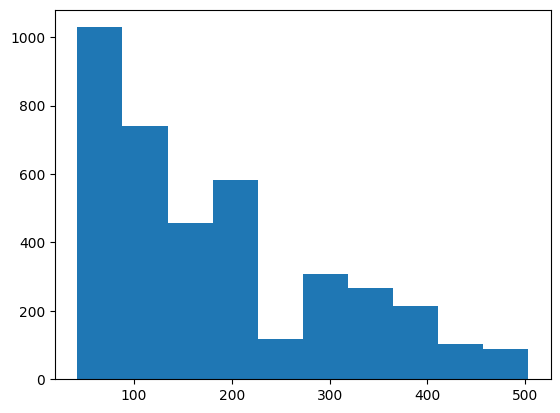

In [84]:
plt.hist(df_fillna['nasdaq close'])
plt.show()

In [95]:
df_fillna['silver close'].isna().sum()
#En çok tekrar eden değerler mode
work_setting_mode = df_fillna['silver close'].mode()
#print(work_setting_mode)
#0    16.08 & 1    16.44 gelir. work_setting_mode[0] dediğimizde 16.08 değeri alınır.
df_fillna['silver close']=df_fillna['silver close'].fillna(value = work_setting_mode[0])
df_fillna.isna().sum()
#nasdaq close'un önceden NaN değerleri silindiği için 0 iken silver close ise mode değeri ile doldurulduğu için 0 alır.

date                   108
sp500 open             264
sp500 high             293
sp500 low              297
sp500 close            293
sp500 volume           300
sp500 high-low         298
nasdaq open            291
nasdaq high            311
nasdaq low             290
nasdaq close             0
nasdaq volume          302
nasdaq high-low        276
us_rates_%            3734
CPI                   3733
usd_chf                316
eur_usd                308
GDP                   3847
silver open            299
silver high            292
silver low             313
silver close             0
silver volume          289
silver high-low        292
oil open               294
oil high               285
oil low                300
oil close              276
oil volume             291
oil high-low           298
platinum open          303
platinum high          299
platinum low           279
platinum close         285
platinum volume        316
platinum high-low      311
palladium open         301
p

In [99]:
df_fillna[['sp500 close']]
#Çift parantez dataframe olarak almayı sağlarken tek parantez pandas seridir. 


,sp500 close
0,114.93
1,113.64
2,NaN
3,115.06
4,113.89
...,...
3899,582.35
3900,584.59
3901,583.63
3902,583.32


In [114]:
df_fillna[['sp500 close']].fillna(method= 'bfill')
#bfill: önceki, ffill: sonraki ile doldurmaya yarar.

Sürekli değişkenlerin incelenmesi

In [104]:
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,46.39,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,NaN
1,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,45.85,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,46.59,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,45.92,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


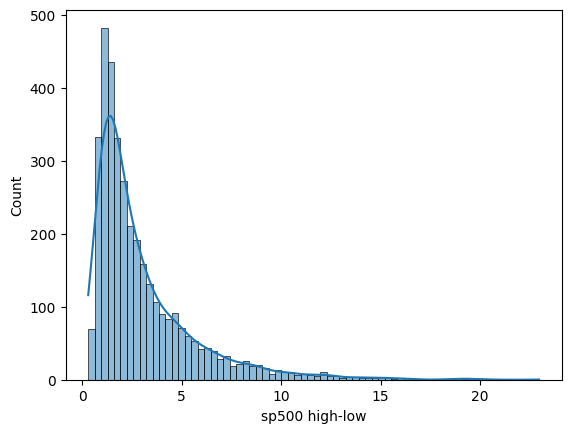

In [119]:
sns.histplot(data = df, x = "sp500 high-low", kde = True, hue = None);
#kde = True, yoğunluk verir.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


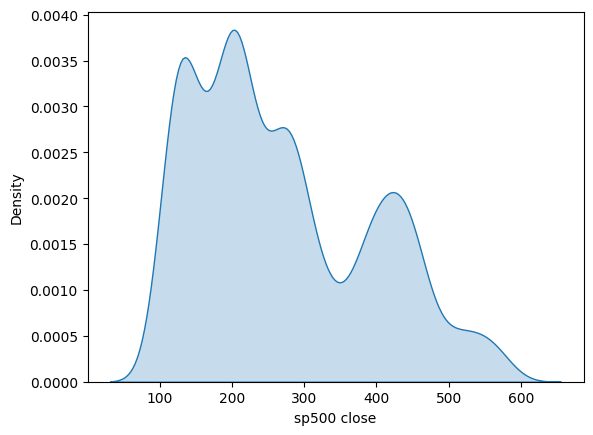

In [116]:
sns.kdeplot(df['sp500 close'], fill = True);

<Axes: >

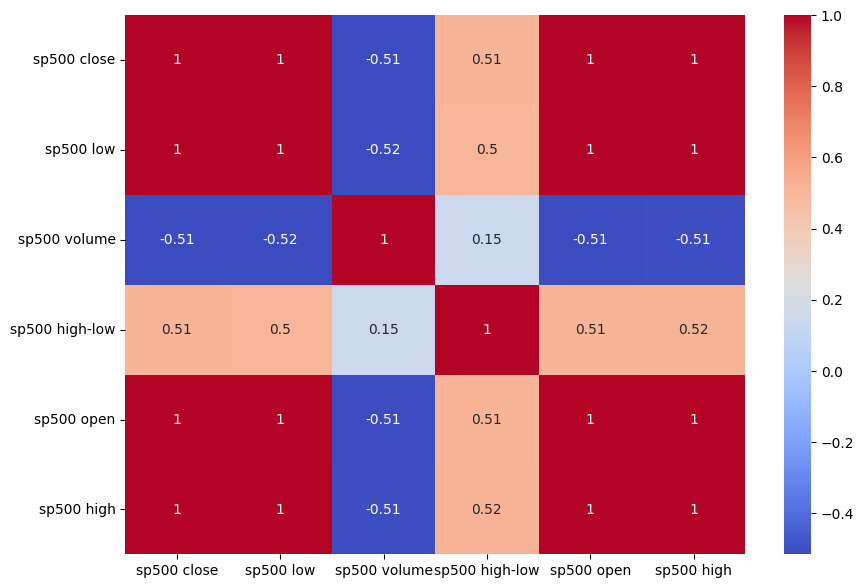

In [127]:
plt.figure(figsize = (10, 7))
sns.heatmap(df[['sp500 close', 'sp500 low','sp500 volume','sp500 high-low','sp500 open','sp500 high']].corr(), annot= True, cmap ="coolwarm")

